In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import wandb
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [81]:
my_entity="hofer1991"
my_project="SVM_Foresthybrid_table"


In [83]:
data = pd.read_csv("out_data/wandb_table_manual/SVC_inclusions.csv", sep=",")
varnames = data.columns
data.shape

(47, 21)

In [84]:
type(data.to_numpy())
data = data.to_numpy()

In [85]:
api = wandb.Api()
runs = api.runs(my_entity + "/" + my_project) 



In [95]:
api = wandb.Api()
runs = api.runs(my_entity + "/" + my_project) 

runs_bic_val = []
runs_acc_val = []
runs_n_val = []
for i in range(1, data.shape[0] + 1):
    try:
        temp = runs[i].summary._json_dict['BIC/val']
        runs_bic_val.append(temp)
    except KeyError:
        runs_bic_val.append(np.nan)
    try:
        temp = runs[i].summary._json_dict['Accuracy/val']
        runs_acc_val.append(temp)
    except KeyError:
        runs_acc_val.append(np.nan)
    try:
        temp = runs[i].config['sel__n_features']
        runs_n_val.append(temp)
    except KeyError:
        runs_n_val.append(np.nan)


In [112]:
min(runs_n_val)

1

In [110]:
# Remove NaN values
valid_indices = np.where(~np.isnan(runs_acc_val))
runs_n_val = np.array(runs_n_val)[valid_indices]
runs_acc_val = np.array(runs_acc_val)[valid_indices]

# Create a DataFrame with the data
df = pd.DataFrame({'Group': runs_n_val, 'Value': runs_acc_val})

# Calculate the mean values by group
mean_values = df.groupby('Group')['Value'].mean()
print(mean_values)

Group
1     0.891017
2     0.895784
3     0.897984
4     0.898625
5     0.884051
6     0.886526
8     0.897525
9     0.899725
10    0.897892
11    0.897709
12    0.899022
13    0.899053
14    0.892301
16    0.898442
17    0.898625
18    0.897525
19    0.898442
20    0.886022
Name: Value, dtype: float64


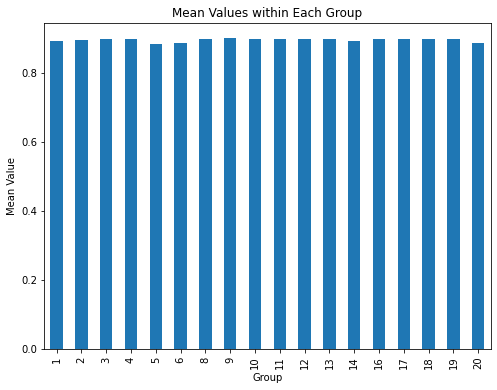

In [111]:
# Plotting
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar')
plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Values within Each Group')
plt.show()

In [89]:
# Compute the minimum and maximum values
min_val = min(runs_bic_val)
max_val = max(runs_bic_val)

# Scale the values using a list comprehension
scaled_runs_bic_val = [(val - min_val) / max_val for val in runs_bic_val]


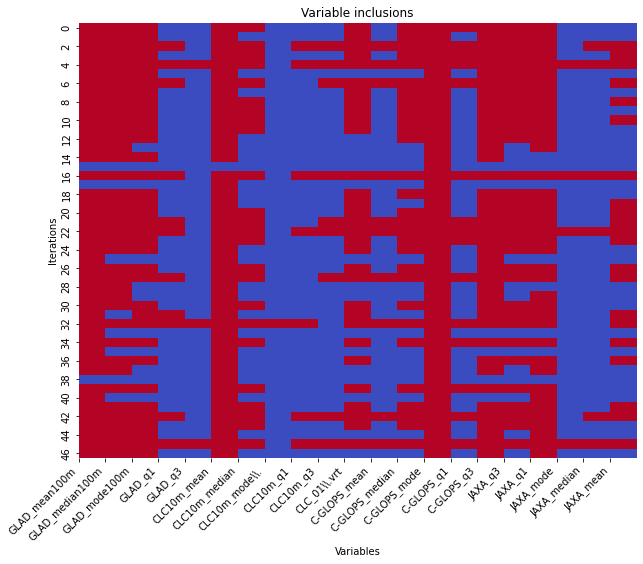

In [90]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap='coolwarm', cbar=False)


# Set the column labels at the bottom
plt.xticks(rotation=45, ha='right')  # Rotate the labels by 45 degrees and align them to the right
plt.xlabel('Variables')
plt.ylabel('Iterations')
plt.title('Variable inclusions')

# Set the column names as labels
plt.xticks(range(len(varnames)), varnames)


# Show the plots
plt.show()